## **Importing Libraries**

In [1]:
# Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

# To ignore warnings generated by the current version of seaborn 
import warnings                  
warnings.filterwarnings("ignore")

In [2]:
!git clone https://github.com/PreetKothari/Petroleum_Data_Science_Projects

Cloning into 'Petroleum_Data_Science_Projects'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 20 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.


In [3]:
import sys
sys.path.append('/content/Petroleum_Data_Science_Projects')

import FDP
from FDP import *

### **Waterflood and EOR Analysis**

In [4]:
# Waterflooding
wf_data = Rec_Analysis()
wf_data.head(5)

Enter Initial Water Saturation, Swi: 0.2
Initial Oil Saturation, Soi: 0.8
Enter Residual Oil Saturation to Water, Sorw: 0.25
Enter Oil Viscosity, Muo: 40
Enter Water Viscosity, Muw: 1


,Recovery,Oil Saturation,Water Saturation,Normalized Water Saturation,Water Rel Perm,Oil Rel Perm,Mobility Contrast,Water Cut
0,0.00,0.800,0.200,0.000000,0.000000,1.000000,0.000000,0.000000
1,0.01,0.792,0.208,0.014545,0.000003,0.956995,0.000129,0.000129
2,0.02,0.784,0.216,0.029091,0.000025,0.915241,0.001076,0.001075
3,0.03,0.776,0.224,0.043636,0.000083,0.874720,0.003800,0.003785
4,0.04,0.768,0.232,0.058182,0.000197,0.835413,0.009430,0.009342


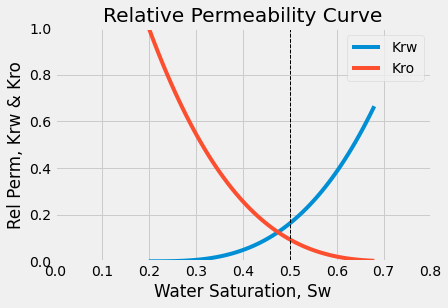

In [5]:
Rel_Perm_Curve(wf_data)

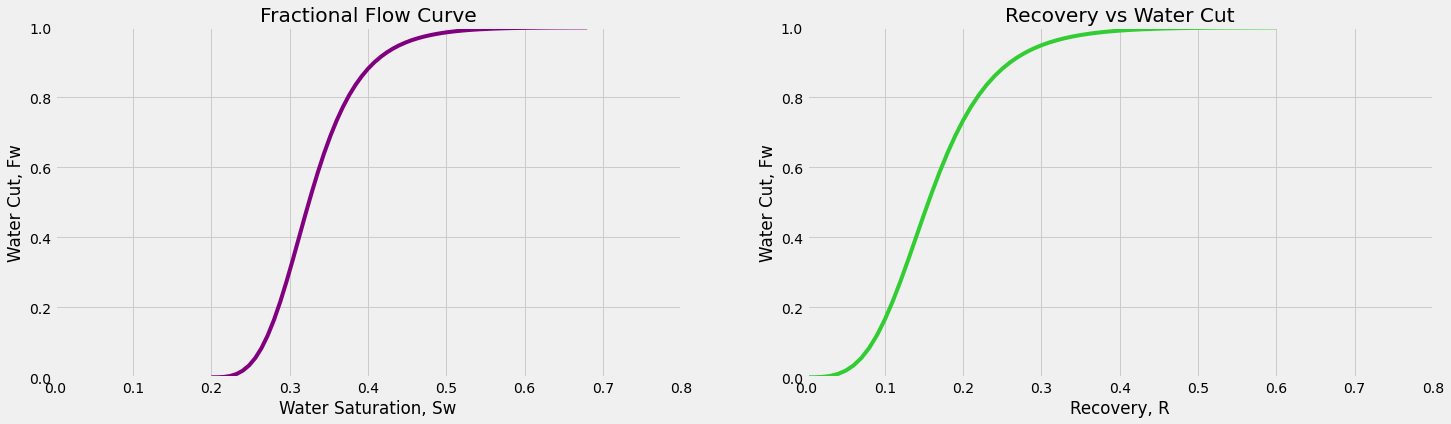

In [6]:
Curves(wf_data)

In [7]:
# Alkaline Surfactant Polymer Flooding
eor_data = Rec_Analysis()
eor_data.head(5)

Enter Initial Water Saturation, Swi: 0.2
Initial Oil Saturation, Soi: 0.8
Enter Residual Oil Saturation to Water, Sorw: 0.15
Enter Oil Viscosity, Muo: 40
Enter Water Viscosity, Muw: 40


,Recovery,Oil Saturation,Water Saturation,Normalized Water Saturation,Water Rel Perm,Oil Rel Perm,Mobility Contrast,Water Cut
0,0.00,0.800,0.200,0.000000,0.000000,1.000000,0.000000,0.000000
1,0.01,0.792,0.208,0.012308,0.000002,0.963529,0.000002,0.000002
2,0.02,0.784,0.216,0.024615,0.000015,0.927957,0.000016,0.000016
3,0.03,0.776,0.224,0.036923,0.000050,0.893270,0.000056,0.000056
4,0.04,0.768,0.232,0.049231,0.000119,0.859459,0.000139,0.000139


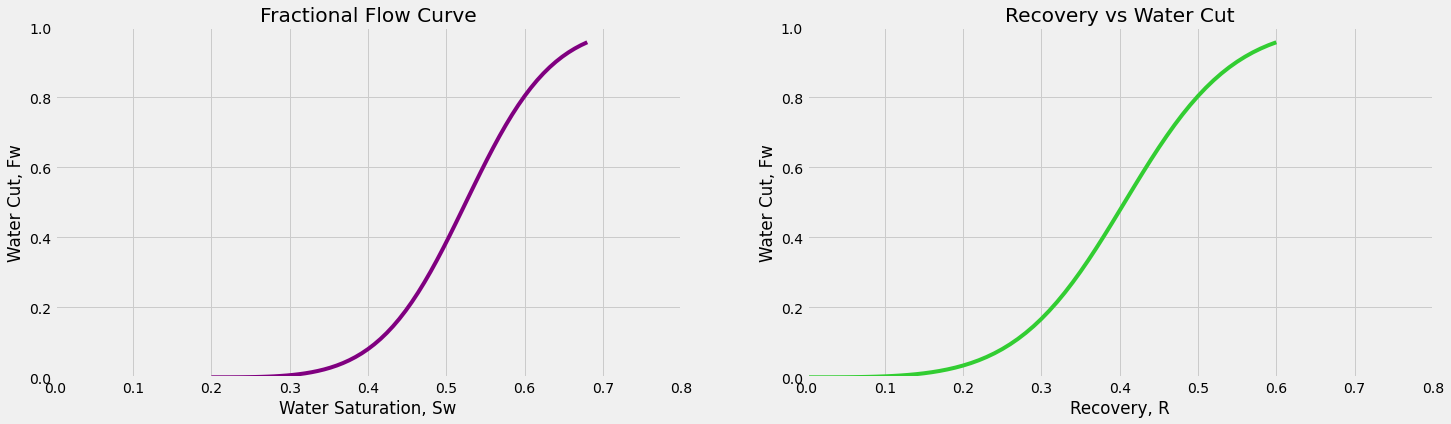

In [8]:
Curves(eor_data)

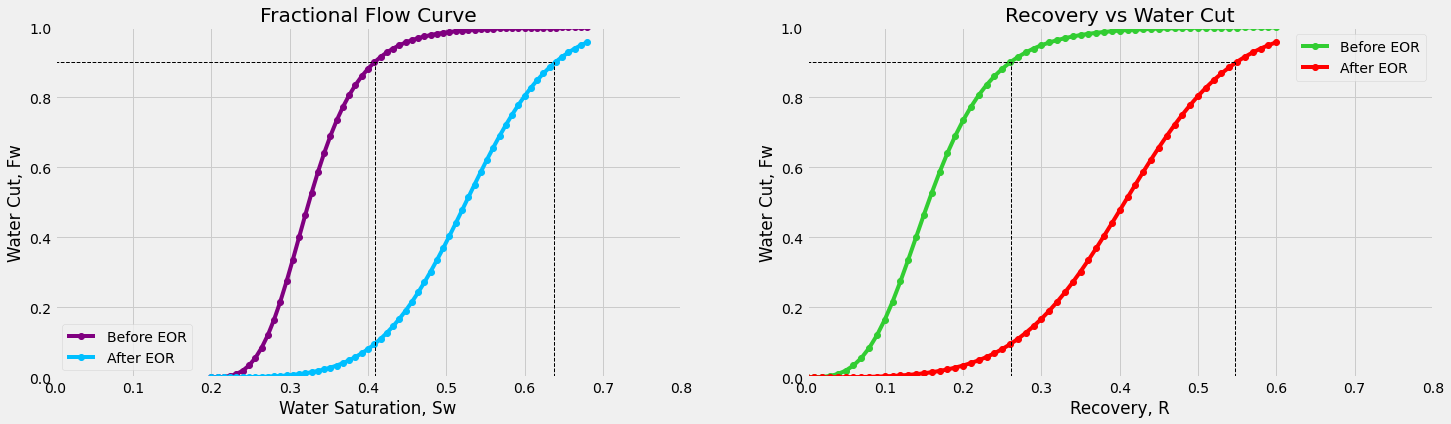

In [9]:
EOR_Curves(wf_data,eor_data)

### **Generating Polynomial Equation for Water Cut as a function of Recovery**

#### **Using Polynomial Regression** 

In [10]:
coef_wf,intercept_wf = Poly_eq(6,wf_data.iloc[:,0:1].values,wf_data.iloc[:,-1:].values)

The approximate recovery at 90% water cut before EOR was 26% and after applying EOR the approximate recovery was 54%.
The approximate water saturation at 90% water cut before EOR was 40% and after applying EOR the approximate water saturation was 63%.


In [11]:
coef_eor,intercept_eor = Poly_eq(6,eor_data.iloc[:,0:1].values,eor_data.iloc[:,-1:].values)

### **Production Profile**

In [12]:
field_pmtrs = Prod_dictionary(20,25,25,25)
field_pmtrs

{'Area': 20, 'OIIP': 25, 'Test Liq. Rate': 25, 'Years': 25}

In [13]:
profile = Production_profile(field_pmtrs,coef_wf,intercept_wf,300)
profile.head()

,Year,Max Wells in Year,Flowing Wells,"Avg. Water-Cut, %","Avg. Oil Rate, m3/d","Avg. Water Rate, m3/d","Cum. Oil, MMm3","Recovery, %"
0,1.0,24,9.166667,0.015086,225.709511,3.457156,0.082384,0.329536
1,2.0,24,33.000000,0.015086,812.554239,12.445761,0.378966,1.515865
2,3.0,24,57.000000,0.000000,1425.000000,0.000000,0.899091,3.596365
3,4.0,24,81.000000,0.019064,1986.394676,38.605324,1.624125,6.496501
4,5.0,24,105.000000,0.122713,2302.877507,322.122493,2.464676,9.858702


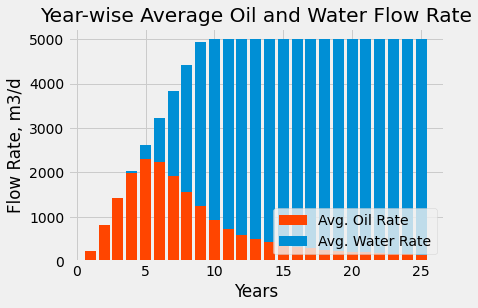

In [14]:
Avg_rate_stacked_bar(profile)

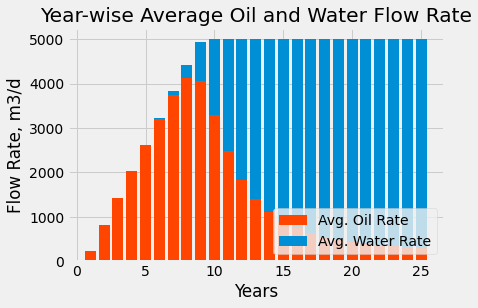

In [15]:
eor_profile = Production_profile(field_pmtrs,coef_eor,intercept_eor,300)
Avg_rate_stacked_bar(eor_profile)

### **Economic Analysis**

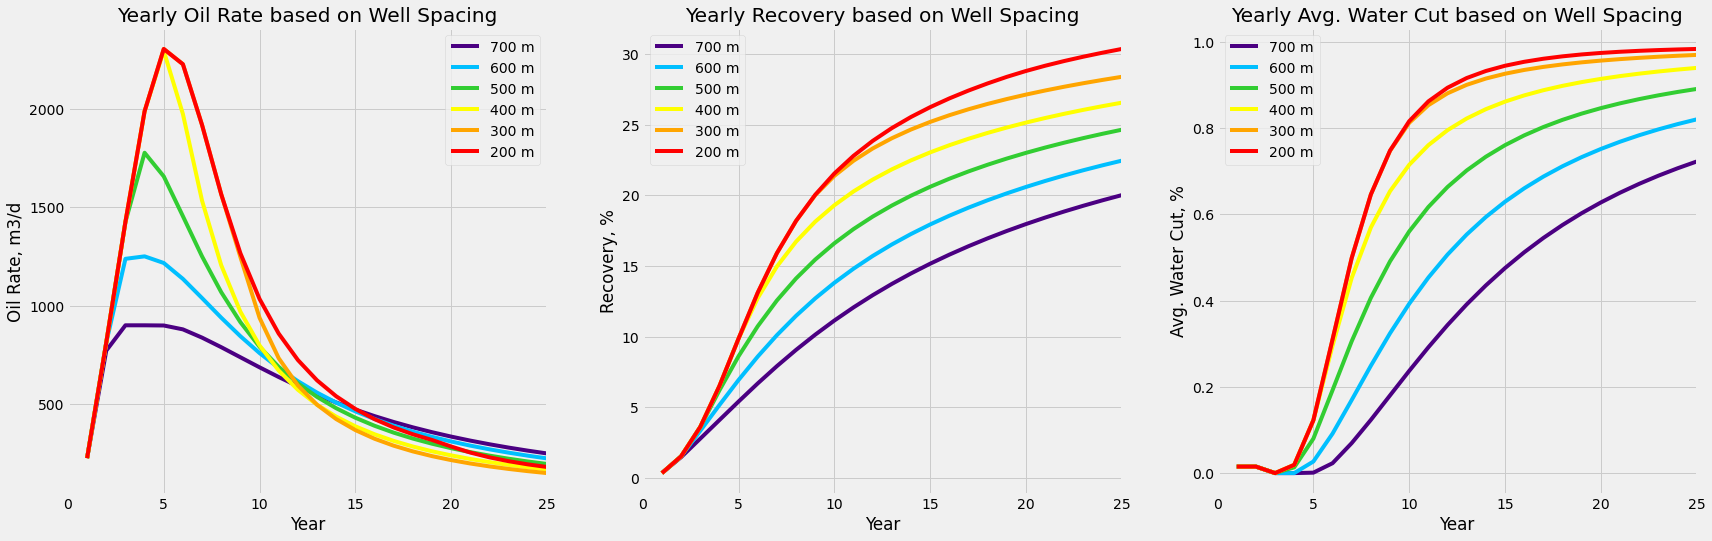

In [16]:
Eco_curves(field_pmtrs,coef_wf,intercept_wf)

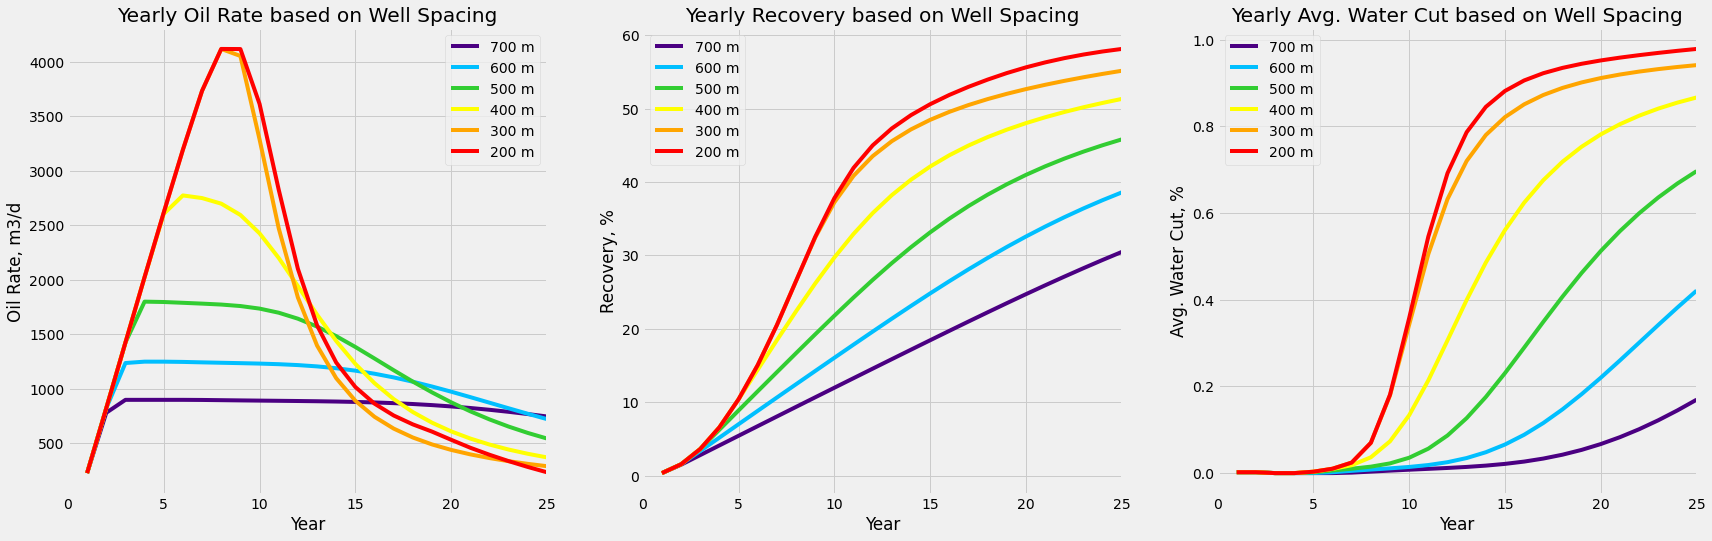

In [17]:
Eco_curves(field_pmtrs,coef_eor,intercept_eor)

In [18]:
exp_pmtrs = Exp_dictionary(100,40,0.25,60,0.14,0.15,0.2)
exp_pmtrs

{'Capex': 100,
 'Discount Rate': 0.14,
 'Oil Price': 60,
 'Opex': 40,
 'Royalty Rate': 0.15,
 'Tax Rate': 0.2,
 'Well Cost': 0.25}

In [19]:
master_table_wf = Eco_analysis(field_pmtrs,exp_pmtrs,coef_wf,intercept_wf)
master_table_wf

The best spacing pattern for this case would be 300 m becuase this spacing pattern generates the highest NPV (Post Tax) equal to $34.84 Million and IRR (Post Tax) equal to 19.81%.


,Master Table,700 m,600 m,500 m,400 m,300 m,200 m
0,Present Value of CAPEX (Mn $),-100.00,-100.00,-100.00,-100.00,-100.00,-100.00
1,Present Worth of Revenue-Pre Tax (Mn $),108.67,129.60,149.46,164.34,168.62,162.88
2,Present Worth of Revenue-Post Tax (Mn $),86.88,103.63,119.51,131.42,134.84,130.25
3,Net Present Value-Pre Tax (Mn $),8.67,29.60,49.46,64.34,68.62,62.88
4,Net Present Value-Post Tax (Mn $),-13.12,3.63,19.51,31.42,34.84,30.25
5,Internal Rate of Return-Pre Tax (%),15.41,18.82,22.01,24.23,24.69,24.22
6,Internal Rate of Return-Post Tax (%),11.76,14.62,17.35,19.33,19.81,19.26
7,Payback Period (Years),6.88,5.62,4.86,4.68,4.70,4.70


In [20]:
expenses_wf = Exp_profile(field_pmtrs,exp_pmtrs,coef_wf,intercept_wf,300)
expenses_wf.head()

,Year,"Oil Production Rate, Mn bbls","Gross Revenue, Mn $","OPEX, Mn $","Royalty, Mn $","Well Cost, Mn $","Net Revenue, Mn $","Tax, Mn $","Profit, Mn $","Cumulative Profit, Mn $"
0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,-100.000000,0.000000,-100.000000,-100.000000
1,1.0,0.518179,31.090722,20.727148,4.663608,6.0,-0.300034,0.000000,-0.300034,-100.300034
2,2.0,1.865443,111.926600,74.617733,16.788990,6.0,14.519877,2.903975,11.615901,-88.684133
3,3.0,3.271482,196.288933,130.859289,29.443340,6.0,29.986304,5.997261,23.989044,-64.695089
4,4.0,4.560319,273.619153,182.412768,41.042873,6.0,44.163511,8.832702,35.330809,-29.364280


In [21]:
tabl_wf = Eco_analysis_table(exp_pmtrs,expenses_wf,300)
tabl_wf

,Master Table,300 m
0,Present Value of CAPEX (Mn $),-100.00
1,Present Worth of Revenue-Pre Tax (Mn $),168.62
2,Present Worth of Revenue-Post Tax (Mn $),134.84
3,Net Present Value-Pre Tax (Mn $),68.62
4,Net Present Value-Post Tax (Mn $),34.84
5,Internal Rate of Return-Pre Tax (%),24.69
6,Internal Rate of Return-Post Tax (%),19.81
7,Payback Period (Years),4.70


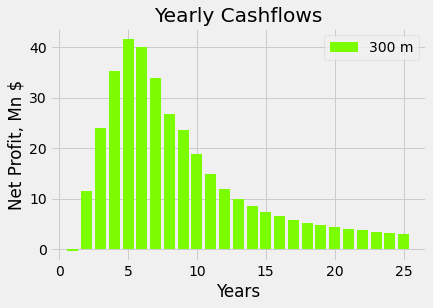

In [22]:
Cashflow_bar(field_pmtrs,exp_pmtrs,coef_wf,intercept_wf,300)

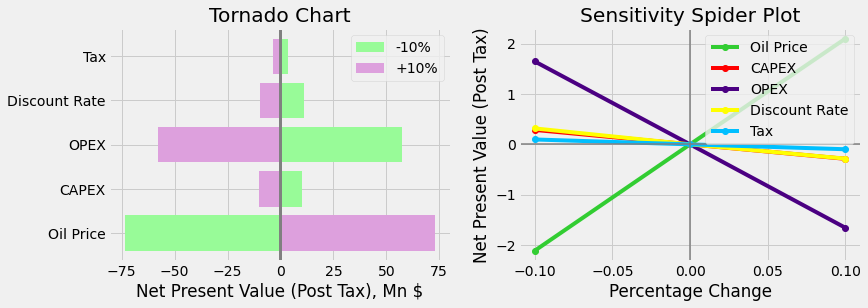

In [23]:
Sensitivity_chart(field_pmtrs,exp_pmtrs,coef_wf,intercept_wf,300)

In [24]:
master_table_eor = Eco_analysis(field_pmtrs,exp_pmtrs,coef_eor,intercept_eor)
master_table_eor

The best spacing pattern for this case would be 300 m becuase this spacing pattern generates the highest NPV (Post Tax) equal to $135.18 Million and IRR (Post Tax) equal to 29.12%.


,Master Table,700 m,600 m,500 m,400 m,300 m,200 m
0,Present Value of CAPEX (Mn $),-100.00,-100.00,-100.00,-100.00,-100.00,-100.00
1,Present Worth of Revenue-Pre Tax (Mn $),129.91,169.40,216.17,264.76,294.02,292.84
2,Present Worth of Revenue-Post Tax (Mn $),103.89,135.48,172.89,211.77,235.18,234.23
3,Net Present Value-Pre Tax (Mn $),29.91,69.40,116.17,164.76,194.02,192.84
4,Net Present Value-Post Tax (Mn $),3.89,35.48,72.89,111.77,135.18,134.23
5,Internal Rate of Return-Pre Tax (%),17.95,22.52,27.37,31.79,33.93,33.91
6,Internal Rate of Return-Post Tax (%),14.54,18.61,22.96,27.05,29.12,29.10
7,Payback Period (Years),6.78,5.53,4.77,4.57,4.59,4.59


In [25]:
expenses_eor = Exp_profile(field_pmtrs,exp_pmtrs,coef_eor,intercept_eor,300)
expenses_eor.head()

,Year,"Oil Production Rate, Mn bbls","Gross Revenue, Mn $","OPEX, Mn $","Royalty, Mn $","Well Cost, Mn $","Net Revenue, Mn $","Tax, Mn $","Profit, Mn $","Cumulative Profit, Mn $"
0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,-100.000000,0.000000,-100.000000,-100.000000
1,1.0,0.525056,31.503370,21.002247,4.725505,6.0,-0.224382,0.000000,-0.224382,-100.224382
2,2.0,1.890202,113.412132,75.608088,17.011820,6.0,14.792224,2.958445,11.833779,-88.390603
3,3.0,3.271482,196.288933,130.859289,29.443340,6.0,29.986304,5.997261,23.989044,-64.401559
4,4.0,4.648948,278.936905,185.957937,41.840536,6.0,45.138433,9.027687,36.110746,-28.290813


In [27]:
tabl_eor = Eco_analysis_table(exp_pmtrs,expenses_eor,300)
tabl_eor

,Master Table,300 m
0,Present Value of CAPEX (Mn $),-100.00
1,Present Worth of Revenue-Pre Tax (Mn $),294.02
2,Present Worth of Revenue-Post Tax (Mn $),235.18
3,Net Present Value-Pre Tax (Mn $),194.02
4,Net Present Value-Post Tax (Mn $),135.18
5,Internal Rate of Return-Pre Tax (%),33.93
6,Internal Rate of Return-Post Tax (%),29.12
7,Payback Period (Years),4.59


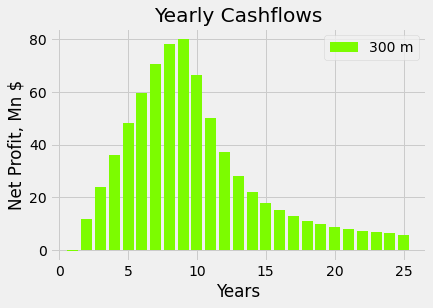

In [28]:
Cashflow_bar(field_pmtrs,exp_pmtrs,coef_eor,intercept_eor,300)

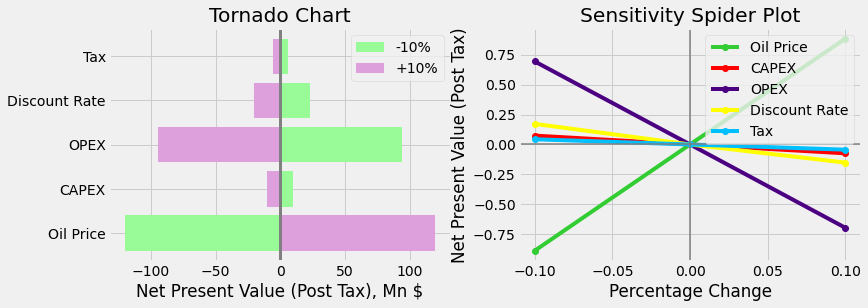

In [29]:
Sensitivity_chart(field_pmtrs,exp_pmtrs,coef_eor,intercept_eor,300)

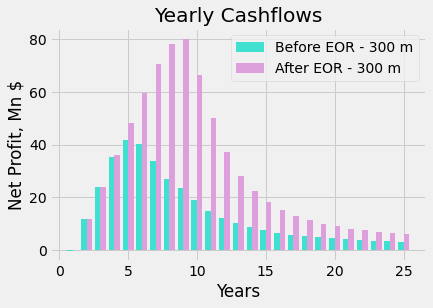

In [30]:
Cashflow_bar_clustered(field_pmtrs,exp_pmtrs,coef_wf,intercept_wf,coef_eor,intercept_eor,300,300)